In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from bokeh.palettes import d3
from bokeh.plotting import ColumnDataSource, figure, output_file, output_notebook, show
from bokeh.embed import components
from bokeh.io import output_file




In [2]:
sys.path.append('../src')
import utils
import settings


In [3]:
labels, features_list = utils.load_features(settings.features_fpath)

In [10]:
labels[:5]

array(['../data/processed/eth_material_archive/material_1000_0.jpg',
       '../data/processed/eth_material_archive/material_1001_0.jpg',
       '../data/processed/eth_material_archive/material_1002_0.jpg',
       '../data/processed/eth_material_archive/material_1003_0.jpg',
       '../data/processed/eth_material_archive/material_1004_0.jpg'],
      dtype='<U63')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1028 samples in 0.006s...
[t-SNE] Computed neighbors for 1028 samples in 0.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1028
[t-SNE] Computed conditional probabilities for sample 1028 / 1028
[t-SNE] Mean sigma: 0.946462
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.840492
[t-SNE] KL divergence after 1000 iterations: 0.958483


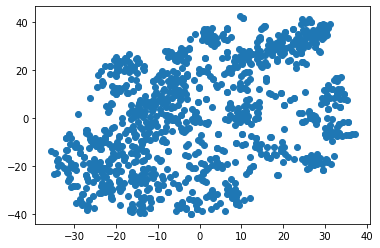

In [8]:
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

num_samples=1028
# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:num_samples]

selected_titles = [ l.split('/')[-1] for l in labels[:num_samples]]
selected_imgs = labels[:num_samples]
tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1])
plt.show()

In [17]:
sorted(tsne_results[:10])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

32.0624390837628

In [11]:
source = ColumnDataSource(data=dict(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    desc=selected_titles,
    imgs=selected_imgs,
    ))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="125" alt="@imgs"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=10, alpha=0.5, source=source)

# export to components
script, div = components(p)

output_file('../plots/material_archive.html', title='Material Archive')
show(p) 

# Graphical Collection

In [6]:
df_m = pd.read_csv('../data/interim/graphik_portal_202101182225.csv')
df_m.head()

,object_id,title,img_url,detail_url,detail_description,img_path
0,3,Marcus Curtius stürzt sich in die Erdspalte,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,Monogrammist IB [Nagler III 1950] (Erwähnt um ...,../data/processed/images/0/3.png
1,18,Die Philister bringen die Bundeslade in den Te...,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,"Battista Franco (Um 1510 - 1561), Um 1525 - 1561",../data/processed/images/0/18.png
2,19,Der grosse Saal im Schloss in Prag [Linke Bild...,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,Egidius Sadeler (der Jüngere) (Um 1570 - 1629)...,../data/processed/images/0/19.png
3,33,Die schöne Försterin,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,"Henry Wyatt (1794 - 1840), nach, 1835, Francis...",../data/processed/images/0/33.png
4,52,Stigmatisation des heiligen Franziskus,https://www.e-gs.ethz.ch/eMP/eMuseumPlus?servi...,https://www.graphikportal.org/document/gpo0021...,"Agostino Carracci (1557 - 1602), Ca. 1583",../data/processed/images/0/52.png


In [8]:

num_feature_dimensions=100
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

In [9]:
# make a color dict
# output_file("toolbar.html")
color_palette = np.array(d3['Category10'][8])
# color_lst = color_palette[df_m['color_map'].to_list()]

num_colors = 8
color_dict = {}
for i in range(num_colors):
    color_dict[i] = d3['Category10'][num_colors][i]

In [10]:
# make color categories
color_desc_dict = {0:'general',
                  1:'porträt'}
df_m['color_map'] = 0
#filter for portraits
fltr = df_m['title'].str.lower().str.contains(color_desc_dict[1])
df_m.loc[fltr, 'color_map'] = 1

# map actual colors
df_m['color_map'] = df_m['color_map'].map(color_dict)

NameError: name 'df_m' is not defined

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.019s...
[t-SNE] Computed neighbors for 1000 samples in 0.221s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.634830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.589447
[t-SNE] KL divergence after 1000 iterations: 1.108566


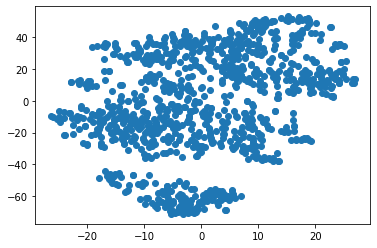

In [17]:
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

num_samples=1000
# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:num_samples]
selected_class_ids = labels[:num_samples]

tdf = df_m.loc[labels[:num_samples],:]
selected_titles = tdf['title'].to_list()
selected_colors = tdf['color_map'].to_list()

ser_img = tdf.loc[:,'img_url'].str.replace('resolution=superImageResolution','resolution=lowImageResolution')
selected_imgs = ser_img.to_list()[:num_samples]
tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
c=selected_class_ids
cmap=colormap
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1])
# plt.colorbar(scatter_plot)
plt.show()

In [21]:


source = ColumnDataSource(data=dict(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    desc=selected_titles,
    imgs=selected_imgs,
    ))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="75" alt="@imgs"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=10, color='colors', alpha=0.5, source=source)

# export to components
script, div = components(p)

show(p)

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-21-61f70c95bdbb>, line 1)

In [36]:
print(div)


<div class="bk-root" id="c8bc6831-6f60-4b67-ab96-516993225a37" data-root-id="1246"></div>


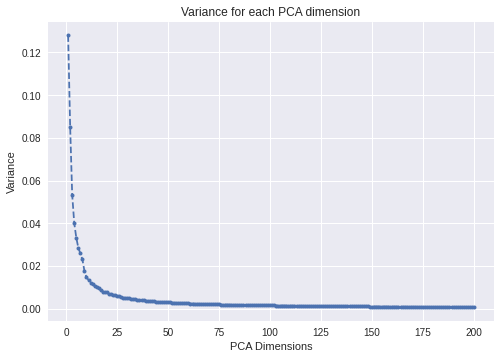

In [15]:
pca = PCA(200)
pca.fit(features_list)
plt.style.use('seaborn')
plt.plot(range(1,201),pca.explained_variance_ratio_,'o--', markersize=4)
plt.title ('Variance for each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()